# The Impact of external factors on the stock market
### Submitted By:  Amit Shukrun and Omer Ran Bashusha


In [6]:
import os
import json
import time
import tweepy
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from time import strptime
from selenium import webdriver
from sklearn import linear_model
from sklearn.metrics import r2_score
from webdriver_manager.chrome import ChromeDriverManager
%matplotlib inline
from matplotlib.dates import DateFormatter

## Research question
In our project we will examine whether external factors such as: people of high status and social influence affect the stock market.
In addition, we will examine whether important dates have a direct impact on the stock market.


#### S&P-500
S&P-500 is a company well known around the world as a creator of financial market indices—widely used as investment benchmarks—a data source, and an issuer of credit ratings for companies and debt obligations. It's perhaps best-known for the popular and often-cited S&P 500 Index.


The company's roots date back to the 1860s. Since 2016, with offices in 26 countries, its official corporate name has been S&P Global.


KEY TAKEAWAYS:
* S&P-500 is a leading index provider and data source of independent credit ratings.
* The McGraw-Hill Cos. purchased S&P in 1966, and in 2016, the company became known as S&P Global.
* Standard & Poor's is one of the largest credit rating agencies, assigning letter grades to companies and countries and the debt they issue on a scale of AAA to D, indicating their degree of investment risk.
* The popular S&P 500 Index is perhaps Standard & Poor's best-known product.
* The S&P 500 is the basis for many investments, including futures contracts, mutual funds, and ETFs.

#### Nasdaq
Nasdaq is a global electronic marketplace for buying and selling securities. Nasdaq was created by the National Association of Securities Dealers (NASD), which is now known as the Financial Industry Regulatory Authority (FINRA). The marketplace was created so that investors could trade securities on a computerized, speedy, and transparent system, and it commenced operations on February 8, 1971.


KEY TAKEAWAYS:
* Nasdaq is a global electronic marketplace for buying and trading securities. It was the world's first electronic exchange. Most of the world's technology giants, including Apple and Facebook, are listed on the Nasdaq.
* It operates 25 markets, one clearinghouse, and five central securities depositories in the United States and Europe.
* The Nasdaq also lists popular cryptocurrencies.

#### Bitcoin
Bitcoin, often described as a cryptocurrency, a virtual currency or a digital currency - is a type of money that is completely virtual.
It's like an online version of cash. You can use it to buy products and services, but not many shops accept Bitcoin yet and some countries have banned it altogether.
However, some companies are beginning to buy into its growing influence

### create data freme:
crowling on yahoo finance website and takes all the indices of those markets  
s&p, nasdaq and bitcoin


The challenges:
* The site works in the form of data loading dynamically so we had to combine the crowling with selenium
* We have created a generic function that accepts each index one after the other and puts them all into one datafame

In [7]:
stocks_symbol = {"s&p": "%5EGSPC", "nasdaq": "%5EIXIC", "bitcoin": "BTC-USD"}
base_url = f"https://finance.yahoo.com/quote/"
date_range = f"/history?period1=1420070400&period2=1622505600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true"
driver = None
stocks_data = {}


def loading_page(url, stock):
    driver = webdriver.Chrome(executable_path=ChromeDriverManager().install())
    driver.implicitly_wait(30)
    driver.get(url)
    eop = driver.find_element_by_xpath('//span[contains(text(),"Close price adjusted for splits")]')
    for x in range(50):
        driver.execute_script("arguments[0].scrollIntoView();", eop)
        time.sleep(0.5)
    right_table = driver.find_element_by_tag_name('tbody')
    columns = {"date": [], f"{stock}_open": [], f"{stock}_high": [], f"{stock}_low": [], f"{stock}_close": [], f"{stock}_adj": [], f"{stock}_volume": []}
    for row in right_table.find_elements_by_tag_name('tr'):
        cells = row.find_elements_by_tag_name('td')
        if len(cells) == 7:
            for column, num in zip(columns, range(len(columns))):
                if stock == 'bitcoin' and cells[0].text not in stocks_data["date"]:
                    break
                columns[column].append(cells[num].text)
    stocks_data.update(columns)
    driver.close()
    return stocks_data

In [8]:
def create_df():
    for stock in stocks_symbol:
        url = base_url + stocks_symbol[stock] + date_range
        loading_page(url, stock)
    df = pd.DataFrame(data=stocks_data)
    return df

In [9]:
stock_df = create_df()
stock_df.head()



====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Driver [C:\Users\Amit Shukrun\.wdm\drivers\chromedriver\win32\91.0.4472.101\chromedriver.exe] found in cache


====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Driver [C:\Users\Amit Shukrun\.wdm\drivers\chromedriver\win32\91.0.4472.101\chromedriver.exe] found in cache


====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Driver [C:\Users\Amit Shukrun\.wdm\drivers\chromedriver\win32\91.0.4472.101\chromedriver.exe] found in cache


,date,s&p_open,s&p_high,s&p_low,s&p_close,s&p_adj,s&p_volume,nasdaq_open,nasdaq_high,nasdaq_low,nasdaq_close,nasdaq_adj,nasdaq_volume,bitcoin_open,bitcoin_high,bitcoin_low,bitcoin_close,bitcoin_adj,bitcoin_volume
0,"May 28, 2021","4,210.77","4,218.36","4,203.57","4,204.11","4,204.11","4,199,270,000","13,792.05","13,820.87","13,747.61","13,748.74","13,748.74","4,435,220,000","38,507.08","38,856.97","34,779.04","35,697.61","35,697.61","55,200,191,952"
1,"May 27, 2021","4,201.94","4,213.38","4,197.78","4,200.88","4,200.88","5,201,110,000","13,742.59","13,776.52","13,701.63","13,736.28","13,736.28","5,057,550,000","39,316.89","40,379.62","37,247.90","38,436.97","38,436.97","43,210,968,721"
2,"May 26, 2021","4,191.59","4,202.61","4,184.11","4,195.99","4,195.99","3,674,490,000","13,693.94","13,750.16","13,679.59","13,738.00","13,738.00","4,231,140,000","38,392.63","40,782.08","37,905.84","39,294.20","39,294.20","51,346,735,160"
3,"May 25, 2021","4,205.94","4,213.42","4,182.52","4,188.13","4,188.13","3,420,870,000","13,721.54","13,751.14","13,631.80","13,657.17","13,657.17","4,084,480,000","38,795.78","39,776.35","36,581.43","38,402.22","38,402.22","56,211,915,803"
4,"May 24, 2021","4,170.16","4,209.52","4,170.16","4,197.05","4,197.05","2,947,400,000","13,557.21","13,708.85","13,551.01","13,661.17","13,661.17","3,490,650,000","34,700.36","39,835.14","34,551.08","38,705.98","38,705.98","67,359,584,098"


In [10]:
stocks_data = {}
date_range = f"/history?period1=1604739200&period2=1624908123&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true"
url = base_url + "DOGE-USD" + date_range
stock_data = loading_page(url, "DogiCoin")
doge_df = pd.DataFrame(data=stocks_data)



====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Driver [C:\Users\Amit Shukrun\.wdm\drivers\chromedriver\win32\91.0.4472.101\chromedriver.exe] found in cache


__________________________
## data handling

remove_duplicatives makes sure that there is not duplicate rows in the dataframe:

In [11]:
def remove_duplicatives(df):
    return df.drop_duplicates(subset=['date'], keep='first')

convert_datetime_sec takes the dataframe and convert the dates to number of seconds.

The function is designed to convert the date to seconds so that later we can compare the dates of other dataframes.

In [83]:
def convert_datetime_sec(df):
    for date_tweet in df.date:
        old_date = str(date_tweet)
        split_date = old_date.split(" ")
        if hasattr(df, 's&p_open') or hasattr(df, 'DogiCoin_open'):
            m = strptime(split_date[0], '%b').tm_mon
            d = split_date[1][:2]
            y = split_date[2]
            if m < 10:
                m = f"0{m}"
        elif hasattr(df, 'Trump_Tweet'):
            y = int(split_date[2]) + 2000
            d = split_date[0]
            m = strptime(split_date[1], '%b').tm_mon
            if m < 10:
                m = f"0{m}"
        else:
            elon_split = split_date[0].split("-")
            d = elon_split[2]
            y = elon_split[0]
            m = elon_split[1]
        
        df.loc[df.date == date_tweet, 'date'] = int(datetime.datetime(int(y), int(m), int(d), 0, 0).timestamp())
    return df


convert_str_to_num takes the columns of stocks market and convert them to numbers - So that we can display them on the graphs and put them into the model

In [84]:
def convert_str_to_num(df):
    for column in df.columns:
        if column == 'date':
            continue
        for row in df[column]:
            if type(row) == str:
                new_value = row.replace(",", "")
            try:
                df.loc[df[column] == row, column] = float(new_value)
            except Exception:
                df.loc[df[column] == row, column] = 0
    return df

compare_dates_df_stock create list of numbers (1 or 0) - if the date on the dataframe is equal to the date on the list (call "dates") so add 1, else add 0. 

The purpose of the function is to show on which day of trading there were also special cases (e.g .: tweets of influencers, holidays, etc ..)

In [85]:
def compare_dates_df_stock(stock_df, dates):
    is_exist_column = []
    for stock_date in stock_df['date']:
        flag = False
        for date in dates:
            if stock_date == date:
                flag = True
                break
        if flag:
            is_exist_column.append(1)
        else:
            is_exist_column.append(0)
    return is_exist_column

create_holidays_date convert he function is designed to convert the date to seconds so that later we can compare the dates of other dataframes.

In [117]:
def create_holidays_date():
    holidays = []
    dates = []
    with open('holidays1.json') as json_file:
        data = json.load(json_file)
    for holiday in data:
        holidays.extend(data[holiday])
    for day in holidays:
        split_date = day.split("-")
        m = split_date[1]
        d = split_date[0]
        y = split_date[2]
        dates.append(int(datetime.datetime(int(y), int(m), int(d), 0, 0).timestamp()))
    data = np.array(dates)
    return pd.Series(data)


In [118]:
def convert_str_to_date(df, name_col):
    for date_df in df[name_col]:
        old_date = str(date_df)
        split_date = old_date.split(" ")
        m = str(time.strptime(split_date[0], '%b').tm_mon)
        d = split_date[1][:-1]
        y = split_date[2]
        if len(m) < 2:
            m = f"0{m}"
        if len(d) < 2:
            d = f"0{d}"

        df.loc[df[name_col] == date_df, name_col] = datetime.datetime(int(y), int(m), int(d)).strftime('%m-%d-%y')
    return df

In [119]:
print(stock_df)
new_stock = remove_duplicatives(stock_df)
new_stock = new_stock.reset_index(drop=True)
new_stock = convert_str_to_num(new_stock)
print(new_stock)

              date  s&p_open  s&p_high   s&p_low s&p_close   s&p_adj  \
0     May 28, 2021  4,210.77  4,218.36  4,203.57  4,204.11  4,204.11   
1     May 27, 2021  4,201.94  4,213.38  4,197.78  4,200.88  4,200.88   
2     May 26, 2021  4,191.59  4,202.61  4,184.11  4,195.99  4,195.99   
3     May 25, 2021  4,205.94  4,213.42  4,182.52  4,188.13  4,188.13   
4     May 24, 2021  4,170.16  4,209.52  4,170.16  4,197.05  4,197.05   
...            ...       ...       ...       ...       ...       ...   
1608  Jan 08, 2015  2,030.61  2,064.08  2,030.61  2,062.14  2,062.14   
1609  Jan 07, 2015  2,005.55  2,029.61  2,005.55  2,025.90  2,025.90   
1610  Jan 06, 2015  2,022.15  2,030.25  1,992.44  2,002.61  2,002.61   
1611  Jan 05, 2015  2,054.44  2,054.44  2,017.34  2,020.58  2,020.58   
1612  Jan 02, 2015  2,058.90  2,072.36  2,046.04  2,058.20  2,058.20   

         s&p_volume nasdaq_open nasdaq_high nasdaq_low nasdaq_close  \
0     4,199,270,000   13,792.05   13,820.87  13,747.61    13,748

The add_difference_column function adds a column to each stock in which it shows in percentages the difference of the price from yesterday:

In [120]:
def add_difference_column(df, stocks_name):
    copy_df = df.copy()
    for stock in stocks_name:
        new_column = []
        dates = copy_df[f'{stock}_close'].tolist()
        for num in range(len(dates)):
            if num is not 0:
                new_column.append(f"{round((dates[num] - dates[num - 1]) / dates[num - 1],5) * 100}%")
            else:
                new_column.append(f"0.000%")
        copy_df[f'{stock}_change'] = new_column
    return copy_df

stocks_name = ['s&p', 'nasdaq', 'bitcoin']
new_stock = add_difference_column(new_stock, stocks_name)
print(new_stock)

              date s&p_open s&p_high  s&p_low s&p_close  s&p_adj   s&p_volume  \
0     May 28, 2021  4210.77  4218.36  4203.57   4204.11  4204.11  4.19927e+09   
1     May 27, 2021  4201.94  4213.38  4197.78   4200.88  4200.88  5.20111e+09   
2     May 26, 2021  4191.59  4202.61  4184.11   4195.99  4195.99  3.67449e+09   
3     May 25, 2021  4205.94  4213.42  4182.52   4188.13  4188.13  3.42087e+09   
4     May 24, 2021  4170.16  4209.52  4170.16   4197.05  4197.05   2.9474e+09   
...            ...      ...      ...      ...       ...      ...          ...   
1608  Jan 08, 2015  2030.61  2064.08  2030.61   2062.14  2062.14  3.93401e+09   
1609  Jan 07, 2015  2005.55  2029.61  2005.55    2025.9   2025.9  3.80548e+09   
1610  Jan 06, 2015  2022.15  2030.25  1992.44   2002.61  2002.61  4.46011e+09   
1611  Jan 05, 2015  2054.44  2054.44  2017.34   2020.58  2020.58  3.79912e+09   
1612  Jan 02, 2015   2058.9  2072.36  2046.04    2058.2   2058.2   2.7087e+09   

     nasdaq_open nasdaq_hig

<>:7: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:7: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-120-3658d8cdbdc8>:7: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if num is not 0:


In [121]:
api_key = "zaKdM349KR3AXk37jofIwTHWU"
api_secret_key = "QrQpPP78FgjQPergvaPmjFTyCS8Ga4sMcWOQV17PhdeWiAkkhK"
bearer_token = "AAAAAAAAAAAAAAAAAAAAABgWQAEAAAAAZ50NfLPGLEmZYhDNOsdkIRmX%2Fx4%3DdpOkgHfDo6ahomjV9MgtnzUXSDRj1w8l3WtYqkUdMOn0w4LgbR"
access_token = "1397297249621774339-l7b0ZDzNlRRa5ArSKCIty0kfmnnQuZ"
access_token_secret = "5APdwLSgtAtSk5DEBTri4GhKBqluHITBYxHw5xoCtimax"

# Create The Authenticate Object
authenticate = tweepy.OAuthHandler(api_key, api_secret_key)

# Set The Access Token & Access Token Secret
authenticate.set_access_token(access_token, access_token_secret)

# Create The API Object
api = tweepy.API(authenticate, wait_on_rate_limit = True)

get_elon_tweets create dataframe that cointain dates and text of elon mask's tweets: (was taken from the account of elon mask on teitter)

In [122]:
def get_elon_tweets():
  
    screen_name = 'elonmusk'
    count = 200
    new_tweets = api.user_timeline(screen_name = screen_name,count = 200)
    alltweets = []
    alltweets.extend(new_tweets) 
    oldest_tweet = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name,count = 200)
        alltweets.extend(new_tweets)
        oldest_tweet = alltweets[-1].id - 1
    tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in alltweets if "dogecoin" in tweet.text.lower()]
    tweets_df = pd.DataFrame(tweets_list)
    tweets_df.columns = ["date","Id","Tweet"]
    return tweets_df


get_trump_tweets create dataframe that cointain dates and text of trump's tweets that is relative to the stock market: (Because Trump is blocked by Twitter - we went to a site that contains all his tweets related to the stock market)

In [123]:
def get_trump_tweets():
    driver = webdriver.Chrome(executable_path=ChromeDriverManager().install())
    driver.implicitly_wait(10)
    driver.get(f"https://www.bloomberg.com/features/trump-tweets-market")
    try:
        checkbox = driver.find_element_by_id("recaptcha-anchor")
        checkbox.click()
        time.sleep(10)
    except Exception:
        pass

    trump_dates = []
    trump_text = []
    tweets = driver.find_elements_by_class_name("phone__tweet")
    for tweet in tweets:
        elements = tweet.find_elements_by_tag_name("p")
        trump_dates.append(elements[2].text[2:])
        trump_text.append(elements[3].text)

    trump_stats = pd.DataFrame(
        {
        "date" : trump_dates,
        "Trump_Tweet": trump_text,
        })

    driver.close()
    print(trump_stats)
    return trump_stats

In [124]:
trump = get_trump_tweets()
print(trump)



====== WebDriver manager ======
Current google-chrome version is 91.0.4472
Get LATEST driver version for 91.0.4472
Driver [C:\Users\Amit Shukrun\.wdm\drivers\chromedriver\win32\91.0.4472.101\chromedriver.exe] found in cache


          date                                        Trump_Tweet
0    01 Jan 21  Finished off the year with the highest Stock M...
1    01 Jan 21  Finished off the year with the highest Stock M...
2    30 Dec 20  The Wall Street Journal’s very boring & incohe...
3    17 Dec 20  All-time Stock Market high. The Vaccine and th...
4    09 Dec 20             STOCK MARKETS AT NEW ALL TIME HIGHS!!!
..         ...                                                ...
765  30 Jan 17  Where was all the outrage from Democrats and t...
766  26 Jan 17  of jobs and companies lost. If Mexico is unwil...
767  24 Jan 17  Will be meeting at 9:00 with top automobile ex...
768  23 Jan 17  Busy week planned with a heavy focus on jobs a...
769  20 Jan 17  We will bring back our jobs. We will bring bac...

[770 rows x 2 columns]
          date                                        Trump_Tweet
0    01 Jan 21  Finished off the year with the highest Stock M...
1    01 Jan 21  Finished off the year with the highe

In [125]:
new_trump = remove_duplicatives(trump)
new_trump = new_trump.reset_index(drop=True)
print(new_trump)

          date                                        Trump_Tweet
0    01 Jan 21  Finished off the year with the highest Stock M...
1    30 Dec 20  The Wall Street Journal’s very boring & incohe...
2    17 Dec 20  All-time Stock Market high. The Vaccine and th...
3    09 Dec 20             STOCK MARKETS AT NEW ALL TIME HIGHS!!!
4    05 Dec 20            STOCK MARKET REACHES NEW ALL-TIME HIGH!
..         ...                                                ...
450  30 Jan 17  Where was all the outrage from Democrats and t...
451  26 Jan 17  of jobs and companies lost. If Mexico is unwil...
452  24 Jan 17  Will be meeting at 9:00 with top automobile ex...
453  23 Jan 17  Busy week planned with a heavy focus on jobs a...
454  20 Jan 17  We will bring back our jobs. We will bring bac...

[455 rows x 2 columns]


In [126]:
elon = get_elon_tweets()
print(elon)

                 date                   Id  \
0 2021-06-25 11:13:39  1408382877478363137   
1 2021-06-25 02:00:20  1408243632445050887   

                                               Tweet  
0                 @DogecoinRise Starship Super Heavy  
1  @hiddin2urleft @ItsDogeCoin @Investments_CEO @...  


In [127]:
new_elon = remove_duplicatives(elon)
new_elon = new_elon.reset_index(drop=True)
new_elon = convert_datetime_sec(new_elon)
print(new_elon)

         date                   Id  \
0  1624568400  1408382877478363137   
1  1624568400  1408243632445050887   

                                               Tweet  
0                 @DogecoinRise Starship Super Heavy  
1  @hiddin2urleft @ItsDogeCoin @Investments_CEO @...  


In [128]:
holidays = create_holidays_date()
print(holidays)

0     1451512800
1     1483135200
2     1514671200
3     1546207200
4     1577743200
5     1609365600
6     1421532000
7     1452981600
8     1484431200
9     1515967200
10    1547935200
11    1579384800
12    1610920800
13    1423951200
14    1455400800
15    1487455200
16    1518904800
17    1550354400
18    1581804000
19    1613340000
20    1427922000
21    1458770400
22    1492030800
23    1522274400
24    1555534800
25    1586379600
26    1617310800
27    1432414800
28    1464469200
29    1495918800
30    1527368400
31    1558818000
32    1590267600
33    1621803600
34    1435784400
35    1467493200
36    1499029200
37    1530565200
38    1562101200
39    1593637200
40    1441486800
41    1472936400
42    1504386000
43    1535835600
44    1567285200
45    1599339600
46    1448402400
47    1479852000
48    1511215200
49    1543269600
50    1574805600
51    1606255200
52    1450908000
53    1482530400
54    1514066400
55    1545602400
56    1577138400
57    1608760800
dtype: int32


In [129]:
new_stock = convert_datetime_sec(new_stock)
new_trump = convert_datetime_sec(new_trump)
new_column = compare_dates_df_stock(new_stock, new_trump.date)
new_stock["is_trump_tweet"] = new_column
new_column = compare_dates_df_stock(new_stock, new_elon.date)
new_stock["is_elon_tweet"] = new_column
new_column = compare_dates_df_stock(new_stock, holidays)
new_stock["is_holiday"] = new_column
print(new_stock)

            date s&p_open s&p_high  s&p_low s&p_close  s&p_adj   s&p_volume  \
0     1622149200  4210.77  4218.36  4203.57   4204.11  4204.11  4.19927e+09   
1     1622062800  4201.94  4213.38  4197.78   4200.88  4200.88  5.20111e+09   
2     1621976400  4191.59  4202.61  4184.11   4195.99  4195.99  3.67449e+09   
3     1621890000  4205.94  4213.42  4182.52   4188.13  4188.13  3.42087e+09   
4     1621803600  4170.16  4209.52  4170.16   4197.05  4197.05   2.9474e+09   
...          ...      ...      ...      ...       ...      ...          ...   
1608  1420668000  2030.61  2064.08  2030.61   2062.14  2062.14  3.93401e+09   
1609  1420581600  2005.55  2029.61  2005.55    2025.9   2025.9  3.80548e+09   
1610  1420495200  2022.15  2030.25  1992.44   2002.61  2002.61  4.46011e+09   
1611  1420408800  2054.44  2054.44  2017.34   2020.58  2020.58  3.79912e+09   
1612  1420149600   2058.9  2072.36  2046.04    2058.2   2058.2   2.7087e+09   

     nasdaq_open nasdaq_high nasdaq_low  ... bitcoi

_______________________
## visualization

In [ ]:
doge_df = pd.read_csv("df_dogi_coin.csv",usecols = ['DogiCoin_date','DogiCoin_high','DogiCoin_low','DogiCoin_price'], index_col="DogiCoin_date",parse_dates=['DogiCoin_date'])
bit_df = pd.read_csv("df_stocks.csv",usecols = ['bitcoin_date','bitcoin_high','bitcoin_low','bitcoin_price'], index_col="bitcoin_date",parse_dates=['bitcoin_date'])

bit_df.replace(',','', regex=True, inplace=True)
bit_df = bit_df.astype(float)
print(doge_df)
print(bit_df)

In [ ]:
axd = doge_df.plot(figsize=(15,7), linewidth=2, title = "Dogecoin from 22/02/21 to 01/06/21")
plt.xlabel('date',fontsize = 15)
plt.ylabel('price',fontsize = 15);


In [ ]:
axb = bit_df.plot(figsize=(15,7), linewidth=2, title = "Bitcoin from 09/11/20 to 28/05/21")
plt.xlabel('date',fontsize = 15)
plt.ylabel('price',fontsize = 15);

In [ ]:
dogeTweets_df = pd.read_csv("ElonTweets(on Dogecoin).csv")
bitTweets_df = pd.read_csv("JackTweets(on Bitcoin).csv")
print(dogeTweets_df, bitTweets_df)

In [ ]:
plt.style.use("fivethirtyeight")
doge_df = pd.read_csv("df_dogi_coin.csv",usecols = ['DogiCoin_date','DogiCoin_open','DogiCoin_high','DogiCoin_low','DogiCoin_price'], index_col="DogiCoin_date")
dogeTweets = pd.read_csv("ElonTweets(on Dogecoin).csv")
print(doge_df)
fig, ax = plt.subplots(figsize=(15,7))

ax.plot(doge_df.index, doge_df["DogiCoin_price"],linewidth = 2, alpha = .7, label='Price')
ax.legend(loc="upper left") 
ax.plot(doge_df.index, doge_df["DogiCoin_high"],linewidth = 2, alpha = .7, label='High') 
ax.legend(loc="upper left")       
ax.plot(doge_df.index, doge_df["DogiCoin_low"],linewidth = 2, alpha = .7, label='Low')
ax.legend(loc="upper left")   


ax.plot(doge_df.index, doge_df["DogiCoin_price"],"bo", label="Musk's Tweets")
ax.legend(loc="upper left") 
ax.set(xlabel="Date between 22/02/21 -- 01/06/21",
       ylabel="Price",
       title="DOGECOIN on Elon Musk's Tweets")

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%y"))
plt.gca().invert_xaxis()
plt.xticks([])
plt.show()

In [ ]:
try:
  screen_name = 'elonmusk'
  count = 200

  new_tweets = api.user_timeline(screen_name = screen_name,count = 200)

  alltweets = []
  alltweets.extend(new_tweets) 
  oldest_tweet = alltweets[-1].id - 1
  while len(new_tweets)>0:
    new_tweets = api.user_timeline(screen_name = screen_name,count = 200)
    alltweets.extend(new_tweets)
    oldest_tweet = alltweets[-1].id - 1


  print("Pulling all",len(alltweets),"tweets")

  tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in alltweets if "bitcoin" in tweet.text.lower()]

  # # Creation of dataframe from tweets list
  # # Add or remove columns as you remove tweet information
  tweets_df = pd.DataFrame(tweets_list)
  tweets_df.columns = ["Date","Id","Tweet"]
  tweets_df.to_csv("ElonTweets(on bitcoin).csv")
  tweets_df
except:
  print("Failed to fetch data. Run once again ;)")

In [ ]:
bit_df = pd.read_csv("df_stocks.csv",usecols = ['bitcoin_date','bitcoin_high','bitcoin_low','bitcoin_price'])
df2 = convert_str_to_date(bit_df, 'bitcoin_date')

for column in df2.columns:
    if column == 'bitcoin_date':
        continue
    for row in df2[column]:
        if type(row) == str:
            new_value = row.replace(",", "")
        try:
            df2.loc[df2[column] == row, column] = float(new_value)
        except Exception:
            df2.loc[df2[column] == row, column] = 0
print(df2)


df2['bitcoin_date'] = pd.to_datetime(df2['bitcoin_date'])
start_date = '02-02-2020'
end_date = '02-02-2021'
mask = (bit_df['bitcoin_date'] > start_date) & (bit_df['bitcoin_date'] <= end_date)
df2 = df2.loc[mask]



bitTweets = pd.read_csv("ElonTweets(on bitcoin).csv")
fig, ax = plt.subplots(figsize=(15,7))

ax.plot(df2.bitcoin_date, df2["bitcoin_price"],linewidth = 2, alpha = .7, label='Price')
ax.legend(loc="upper left") 
ax.plot(df2.bitcoin_date, df2["bitcoin_high"],linewidth = 2, alpha = .7, label='High') 
ax.legend(loc="upper left")       
ax.plot(df2.bitcoin_date, df2["bitcoin_low"],linewidth = 2, alpha = .7, label='Low')
ax.legend(loc="upper left")   


ax.plot(df2.bitcoin_date, df2["bitcoin_price"],"bo", label="Musk's Tweets")
ax.legend(loc="upper left") 
ax.set(xlabel="Date between 09/11/20 -- 28/05/21",
       ylabel="Price",
       title="Bitcoin on Elon Musk's Tweets")

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%y"))
plt.xticks([])


plt.show()

In [ ]:
copy_df = stock_df[['date', f"s&p_high", f"s&p_low", f"s&p_close"]]
copy_df = convert_str_to_num(copy_df)
copy_df = convert_str_to_date(copy_df, "date")
copy_df =  copy_df.iloc[200:370,:]
copy_df = copy_df.reset_index(drop=True)
print(copy_df)

axd = copy_df.plot(figsize=(15,7),linewidth=1, title = "S&P500 from 10/12/19 to 12/08/20")
plt.xlabel('date',fontsize = 15)
plt.ylabel('price',fontsize = 15);
plt.gca().invert_xaxis()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%y"))
plt.xticks([])
plt.show()

In [ ]:
copy_df['date'] = pd.to_datetime(copy_df['date'])
start_date = '12-10-2019'
end_date = '08-12-2020'
trump = (copy_df['date'] > start_date) & (copy_df['date'] <= end_date)


bitTweets = pd.read_csv("trump_stats.csv")
fig, ax = plt.subplots(figsize=(15,7))

ax.plot(copy_df['date'], copy_df["s&p_close"],linewidth = 2, alpha = .7, label='Price')
ax.legend(loc="upper left") 
ax.plot(copy_df['date'], copy_df["s&p_high"],linewidth = 2, alpha = .7, label='High') 
ax.legend(loc="upper left")       
ax.plot(copy_df['date'], copy_df["s&p_low"],linewidth = 2, alpha = .7, label='Low')
ax.legend(loc="upper left")   


ax.plot(copy_df['date'], copy_df["s&p_close"],"bo", label="Trump Tweets")
ax.legend(loc="upper left") 
ax.set(xlabel="Date between 09/11/20 -- 28/05/21",
       ylabel="Price",
       title="S&P500 on Trump Tweets")

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%y"))
plt.xticks([])


plt.show()

In [ ]:
copy_df = stock_df[['date', f"nasdaq_high", f"nasdaq_low", f"nasdaq_close"]]
copy_df = convert_str_to_num(copy_df)
copy_df = convert_str_to_date(copy_df, "date")
copy_df =  copy_df.iloc[500:720,:]
copy_df = copy_df.reset_index(drop=True)
print(copy_df)


axd = copy_df.plot(figsize=(15,7),linewidth=1, title = "Nasdaq from 20/07/18 to 05/06/19")
plt.xlabel('date',fontsize = 15)
plt.ylabel('price',fontsize = 15);
plt.gca().invert_xaxis()
plt.xticks([])
plt.show()

In [ ]:
copy_df['date'] = pd.to_datetime(copy_df['date'])
start_date = '07-20-2018'
end_date = '06-05-2019'
trump = (copy_df['date'] > start_date) & (copy_df['date'] <= end_date)

bitTweets = pd.read_csv("trump_stats.csv")
fig, ax = plt.subplots(figsize=(15,7))

ax.plot(copy_df['date'], copy_df["nasdaq_close"],linewidth = 2, alpha = .7, label='Price')
ax.legend(loc="upper left") 
ax.plot(copy_df['date'], copy_df["nasdaq_high"],linewidth = 2, alpha = .7, label='High') 
ax.legend(loc="upper left")       
ax.plot(copy_df['date'], copy_df["nasdaq_low"],linewidth = 2, alpha = .7, label='Low')
ax.legend(loc="upper left")   


ax.plot(copy_df['date'], copy_df["nasdaq_close"],"bo", label="Trump Tweets")
ax.legend(loc="upper left") 
ax.set(xlabel="Date between 09/11/20 -- 28/05/21",
       ylabel="Price",
       title="Nasdaq on Trump Tweets")

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%y"))
plt.xticks([])


plt.show()

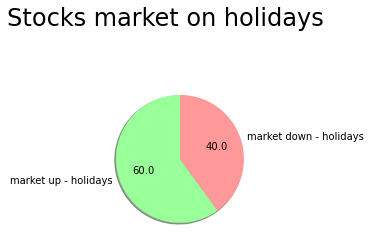

In [130]:
fig = plt.figure(figsize=(16, 10))
fig.suptitle("Stocks market on holidays", fontsize=24)

ax2 = fig.add_subplot(3, 1, 1)
ax2.set_title = 'On special days'
labels = ['market up', 'market down']
colors = ['#99ff99', '#ff9999']

market_up = 0
market_down = 0
for index, row in new_stock.iterrows():
    if int(row['nasdaq_open']) > int(row['nasdaq_close']) and row['is_holiday'] == 1:
        market_down += 1
    elif int(row['nasdaq_open']) < int(row['nasdaq_close']) and row['is_holiday'] == 1:
        market_up += 1
labels2 = ['market up - holidays', 'market down - holidays']
sizes2 = [(market_up/ (market_up + market_down))*100, (market_down/ (market_up + market_down))*100]
ax2.pie(sizes2, labels=labels2, shadow=True, startangle=90, autopct='%.1f', colors=colors)
plt.show()

# machine Learning

## model - linear regration

The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.

The equation for linear regression can be written as:

Here, x1, x2,….xn represent the independent variables while the coefficients θ1, θ2, …. θn  represent the weights. 
For our problem statement, we do not have a set of independent variables. We have only the dates instead. Let us use the date column to extract features like – day, month, year,  mon/fri etc. and then fit a linear regression model.


### train model
LinearRegression fits a linear model with coefficients 
 to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation

In [109]:
def train_model(X_train, y_train):
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    return regr

#### predict model
Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent (target) and independent variable (s) (predictor). This technique is used for forecasting, time series modelling and finding the causal effect relationship between the variables.

In [110]:
def predict(trained_model, X_test):
    x_pred = trained_model.predict(X_test)
    return x_pred

#### evaluate model
r^2 (coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a  score of 0.0.

In [157]:
def evaluate_performance(y_test,y_predicted):
    return r2_score(y_test, y_predicted)

In [158]:
def get_prediction(stock_type, new_stock):
    copy_df = new_stock.copy()
    copy_df = copy_df[['date', f"{stock_type}_open", f"{stock_type}_close", f"{stock_type}_volume", "is_trump_tweet", "is_holiday"]]
    
    copy_df = copy_df.iloc[::-1]
    copy_df = copy_df.reset_index(drop=True)
    cut = int(len(copy_df[f"{stock_type}_open"]) * 0.8)
    train = copy_df[:cut]
    valid = copy_df[cut:]

    x_train = train.drop(f'{stock_type}_close', axis=1)
    y_train = train[f'{stock_type}_close']
    x_valid = valid.drop(f'{stock_type}_close', axis=1)
    y_valid = valid[f'{stock_type}_close']

    trained_model = train_model(x_train, y_train)
    pred_vals = predict(trained_model, x_valid)
    y_pred = pd.Series(pred_vals,index=x_valid.index)
    results = evaluate_performance(y_valid, y_pred)
    print(results)

    valid['Predictions'] = 0
    valid['Predictions'] = pred_vals

    plt.plot(train[f'{stock_type}_close'], linewidth=2)
    plt.plot(valid[[f'{stock_type}_close', 'Predictions']], linewidth=2)
    plt.title(f'{stock_type} price prediction depends on time')
    plt.xlabel('time (days)',fontsize = 15)
    plt.ylabel('price',fontsize = 15)
    plt.show()

___________________________________________
### get prediction for s&p:

0.9925864431035426


<ipython-input-158-57d85e01f36d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-158-57d85e01f36d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred_vals


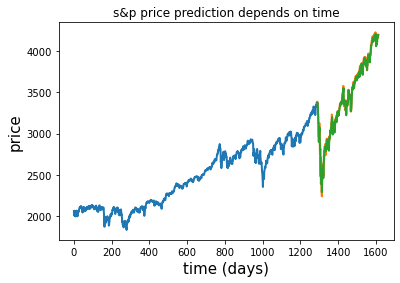

In [159]:
get_prediction('s&p', new_stock)

___________________________________________
### get prediction for Nasdaq:

0.9938886778562525


<ipython-input-158-57d85e01f36d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-158-57d85e01f36d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred_vals


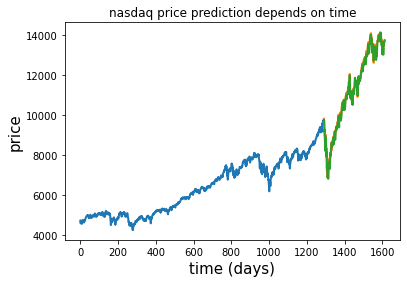

In [160]:
get_prediction('nasdaq', new_stock)

_______________________________________________________________
### get prediction for Bitcoin:

0.9939245530322462


<ipython-input-158-57d85e01f36d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-158-57d85e01f36d>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred_vals


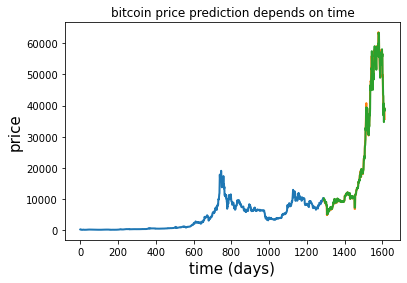

In [164]:
get_prediction('bitcoin', new_stock)